# NIFTY-50 Option Trading Strategy
*   Installing jugaad-data, open source package to fetch nifty 50 data

In [1]:
pip install jugaad-data

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.8/115.8 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.1.3
    Uninstalling click-8.1.3:
      Successfully uninstalled click-8.1.3
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.11.2
    Uninstalling beautifulsoup4-4.11.2:
      Successfully uninstalled beautifulsoup4-4.11.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 2.2.4 requires click>=8.0, but you have click 7.1.2 which is incompatible.
pip-tools 6.13.0 requires click>=8, but you have click 7.1.2 which is incompatible.
yfinance 0.2.18 requires beautifulsoup4>=4.11.1, but you have bea

In [ ]:
# Optional
!pip install --upgrade click
!pip install --upgrade beautifulsoup4

#Feature Creation
This involves fectching nifty 50 and India Vix dat using Jugaad data package and adding 8 new features to nifty 50 data. These features are :-

1. Day of Week
2. Daily Returns from previous close
3. Vix Index for that day
4. Days from weekly expiry
5. Range low from expiry
6. Range high from expiry
7. % of Range low from previous day close
8. % of Range high from previous day close


In [4]:
# Final
from jugaad_data.nse import index_df
from datetime import date
import pandas as pd
import numpy as np

In [14]:
# Final
# Fetching Data
nifty = index_df(symbol="Nifty 50", from_date=date(2021,9,30),to_date=date(2023,3,31))
vix = index_df(symbol="INDIA VIX", from_date=date(2021,9,30),to_date=date(2023,3,31))

# Remove Duplicates and false data and reset Index
nifty = nifty.drop_duplicates(subset='HistoricalDate').reset_index(drop=True)
nifty = nifty.drop(nifty[nifty['INDEX_NAME'] == 'NIFTY BANK'].index).reset_index(drop=True)

# Sort nifty by historical date in descending order
nifty = nifty.sort_values(by='HistoricalDate', ascending=False)

# Reset the index
nifty = nifty.reset_index(drop=True)

In [15]:
nifty

,Index Name,INDEX_NAME,HistoricalDate,OPEN,HIGH,LOW,CLOSE
0,Nifty 50,NIFTY 50,2023-03-31,17210.35,17381.60,17204.65,17359.75
1,Nifty 50,NIFTY 50,2023-03-29,16977.30,17126.15,16940.60,17080.70
2,Nifty 50,NIFTY 50,2023-03-28,17031.75,17061.75,16913.75,16951.70
3,Nifty 50,NIFTY 50,2023-03-27,16984.30,17091.00,16918.55,16985.70
4,Nifty 50,NIFTY 50,2023-03-24,17076.20,17109.45,16917.35,16945.05
...,...,...,...,...,...,...,...
369,Nifty 50,NIFTY 50,2021-10-06,17861.50,17884.60,17613.15,17646.00
370,Nifty 50,NIFTY 50,2021-10-05,17661.35,17833.45,17640.90,17822.30
371,Nifty 50,NIFTY 50,2021-10-04,17615.55,17750.90,17581.35,17691.25
372,Nifty 50,NIFTY 50,2021-10-01,17531.90,17557.15,17452.90,17532.05


In [16]:
# Final
nifty = nifty.drop(['Index Name'], axis=1)
vix = vix.drop(['Index Name'], axis=1)
nifty['Day_of_week'] = pd.to_datetime(nifty['HistoricalDate'],format='%Y-%m-%d').dt.strftime('%A')

In [17]:
# Final
returns = [(nifty['CLOSE'][i] - nifty['CLOSE'][i+1]) / nifty['CLOSE'][i+1] * 100 for i in range(len(nifty) - 1)]
returns.append(float('nan'))
nifty['Returns_Daily'] = returns

In [18]:
# Final
merged_df = nifty.merge(vix[['HistoricalDate', 'CLOSE']].fillna('np.nan'), on='HistoricalDate', how='left')
nifty['Vix'] = merged_df['CLOSE_y']

In [19]:
nifty

,INDEX_NAME,HistoricalDate,OPEN,HIGH,LOW,CLOSE,Day_of_week,Returns_Daily,Vix
0,NIFTY 50,2023-03-31,17210.35,17381.60,17204.65,17359.75,Friday,1.633715,12.94
1,NIFTY 50,2023-03-29,16977.30,17126.15,16940.60,17080.70,Wednesday,0.760986,13.63
2,NIFTY 50,2023-03-28,17031.75,17061.75,16913.75,16951.70,Tuesday,-0.200168,15.10
3,NIFTY 50,2023-03-27,16984.30,17091.00,16918.55,16985.70,Monday,0.239893,15.45
4,NIFTY 50,2023-03-24,17076.20,17109.45,16917.35,16945.05,Friday,-0.772096,15.24
...,...,...,...,...,...,...,...,...,...
369,NIFTY 50,2021-10-06,17861.50,17884.60,17613.15,17646.00,Wednesday,-0.989210,17.33
370,NIFTY 50,2021-10-05,17661.35,17833.45,17640.90,17822.30,Tuesday,0.740762,16.40
371,NIFTY 50,2021-10-04,17615.55,17750.90,17581.35,17691.25,Monday,0.908051,16.74
372,NIFTY 50,2021-10-01,17531.90,17557.15,17452.90,17532.05,Friday,-0.488701,17.21


# Processing Expries


*   expiry_dates function jugaad data is used to fetch expiry. 
*   Had some issue while fetching expiry for Nifty 50 so using BankNifty.
*   Note :- Weekly expiry of both are same.



In [20]:
# Final
from jugaad_data.nse import expiry_dates

nifty['Days_from_expiry'] = -1
nifty['Days_from_expiry'] = nifty['Days_from_expiry'].astype('Int64')

for i in range(len(nifty)):
    try:
        date_ = nifty['HistoricalDate'][i].date()
        exp = expiry_dates(date_,symbol = "BANKNIFTY")
        if date_ in exp:
          nifty['Days_from_expiry'][i] = 0;
          print(f"{date_} is expiry")
    except Exception as e:
        print(f"Error processing row {i}: {e}")

nifty

2023-03-29 is expiry
2023-03-23 is expiry
2023-03-16 is expiry
2023-03-09 is expiry
2023-03-02 is expiry
2023-02-23 is expiry
2023-02-16 is expiry
Error processing row 32: invalid literal for int() with base 10: '0.0000000'
2023-02-09 is expiry
2023-02-02 is expiry
2023-01-25 is expiry
2023-01-19 is expiry
2023-01-12 is expiry
2023-01-05 is expiry
2022-12-29 is expiry
2022-12-22 is expiry
2022-12-15 is expiry
2022-12-08 is expiry
2022-12-01 is expiry
2022-11-24 is expiry
2022-11-17 is expiry
2022-11-10 is expiry
2022-11-03 is expiry
2022-10-27 is expiry
2022-10-20 is expiry
2022-10-13 is expiry
2022-10-06 is expiry
2022-09-29 is expiry
2022-09-22 is expiry
2022-09-15 is expiry
2022-09-08 is expiry
2022-09-01 is expiry
2022-08-25 is expiry
2022-08-18 is expiry
2022-08-11 is expiry
2022-08-04 is expiry
2022-07-28 is expiry
2022-07-21 is expiry
2022-07-14 is expiry
2022-07-07 is expiry
2022-06-30 is expiry
2022-06-23 is expiry
2022-06-16 is expiry
2022-06-09 is expiry
2022-06-02 is expiry

,INDEX_NAME,HistoricalDate,OPEN,HIGH,LOW,CLOSE,Day_of_week,Returns_Daily,Vix,Days_from_expiry
0,NIFTY 50,2023-03-31,17210.35,17381.60,17204.65,17359.75,Friday,1.633715,12.94,-1
1,NIFTY 50,2023-03-29,16977.30,17126.15,16940.60,17080.70,Wednesday,0.760986,13.63,0
2,NIFTY 50,2023-03-28,17031.75,17061.75,16913.75,16951.70,Tuesday,-0.200168,15.10,-1
3,NIFTY 50,2023-03-27,16984.30,17091.00,16918.55,16985.70,Monday,0.239893,15.45,-1
4,NIFTY 50,2023-03-24,17076.20,17109.45,16917.35,16945.05,Friday,-0.772096,15.24,-1
...,...,...,...,...,...,...,...,...,...,...
369,NIFTY 50,2021-10-06,17861.50,17884.60,17613.15,17646.00,Wednesday,-0.989210,17.33,-1
370,NIFTY 50,2021-10-05,17661.35,17833.45,17640.90,17822.30,Tuesday,0.740762,16.40,-1
371,NIFTY 50,2021-10-04,17615.55,17750.90,17581.35,17691.25,Monday,0.908051,16.74,-1
372,NIFTY 50,2021-10-01,17531.90,17557.15,17452.90,17532.05,Friday,-0.488701,17.21,-1


In [21]:
# Final
temp_days_from_expiry = -1
for i in range(len(nifty)):
  if temp_days_from_expiry !=-1:
    temp_days_from_expiry+=1
  if nifty['Days_from_expiry'][i] == 0:
    temp_days_from_expiry = 0
  else :
    nifty['Days_from_expiry'][i] = temp_days_from_expiry

In [22]:
# Final
nifty['Range_low'] = nifty['LOW']
nifty['Range_high'] = nifty['HIGH']
low = nifty['LOW'][0]
high = nifty['HIGH'][0]
for i in range(len(nifty)):
  if nifty['Days_from_expiry'][i] == 0:
    low  = nifty['LOW'][i]
    high = nifty['HIGH'][i]
  else :
    low = min(low,nifty['LOW'][i])
    high = max(high,nifty['HIGH'][i])
  nifty['Range_low'][i] = low
  nifty['Range_high'][i] = high 

<ipython-input-22-71bd50111157>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nifty['Range_low'][i] = low
<ipython-input-22-71bd50111157>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nifty['Range_high'][i] = high


In [23]:
nifty

,INDEX_NAME,HistoricalDate,OPEN,HIGH,LOW,CLOSE,Day_of_week,Returns_Daily,Vix,Days_from_expiry,Range_low,Range_high
0,NIFTY 50,2023-03-31,17210.35,17381.60,17204.65,17359.75,Friday,1.633715,12.94,-1,17204.65,17381.60
1,NIFTY 50,2023-03-29,16977.30,17126.15,16940.60,17080.70,Wednesday,0.760986,13.63,0,16940.60,17126.15
2,NIFTY 50,2023-03-28,17031.75,17061.75,16913.75,16951.70,Tuesday,-0.200168,15.10,1,16913.75,17126.15
3,NIFTY 50,2023-03-27,16984.30,17091.00,16918.55,16985.70,Monday,0.239893,15.45,2,16913.75,17126.15
4,NIFTY 50,2023-03-24,17076.20,17109.45,16917.35,16945.05,Friday,-0.772096,15.24,3,16913.75,17126.15
...,...,...,...,...,...,...,...,...,...,...,...,...
369,NIFTY 50,2021-10-06,17861.50,17884.60,17613.15,17646.00,Wednesday,-0.989210,17.33,1,17613.15,17884.60
370,NIFTY 50,2021-10-05,17661.35,17833.45,17640.90,17822.30,Tuesday,0.740762,16.40,2,17613.15,17884.60
371,NIFTY 50,2021-10-04,17615.55,17750.90,17581.35,17691.25,Monday,0.908051,16.74,3,17581.35,17884.60
372,NIFTY 50,2021-10-01,17531.90,17557.15,17452.90,17532.05,Friday,-0.488701,17.21,4,17452.90,17884.60


In [24]:
# Final
nifty['Range_low_from_PreClose_PreCent'] = nifty['OPEN'] - nifty['Range_low']
nifty['Range_high_from_PreClose_PreCent'] = nifty['Range_high'] - nifty['OPEN']
low = nifty['LOW'][0]
high = nifty['HIGH'][0]
for i in range(len(nifty)-1):
  nifty['Range_low_from_PreClose_PreCent'][i] = min(0,nifty['Range_low'][i]-nifty['CLOSE'][i+1])/nifty['CLOSE'][i+1]*100
  nifty['Range_high_from_PreClose_PreCent'][i] = max(0,nifty['Range_high'][i]-nifty['CLOSE'][i+1])/nifty['CLOSE'][i+1]*100

<ipython-input-24-d38bc7614eac>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nifty['Range_low_from_PreClose_PreCent'][i] = min(0,nifty['Range_low'][i]-nifty['CLOSE'][i+1])/nifty['CLOSE'][i+1]*100
<ipython-input-24-d38bc7614eac>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nifty['Range_high_from_PreClose_PreCent'][i] = max(0,nifty['Range_high'][i]-nifty['CLOSE'][i+1])/nifty['CLOSE'][i+1]*100


In [25]:
# Fill Vix with previous day data if NA
# Final
for i in range(len(nifty)):
  if pd.isna(nifty['Vix'][i]):
    nifty['Vix'][i] = nifty['Vix'][i-1]
    print(f"NA at {i}: Value set to {nifty['Vix'][i] }")

NA at 103: Value set to 15.94
NA at 104: Value set to 15.94
NA at 123: Value set to 19.57
NA at 124: Value set to 19.57
NA at 127: Value set to 22.1
NA at 128: Value set to 22.1


<ipython-input-25-9e44123ace7b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nifty['Vix'][i] = nifty['Vix'][i-1]


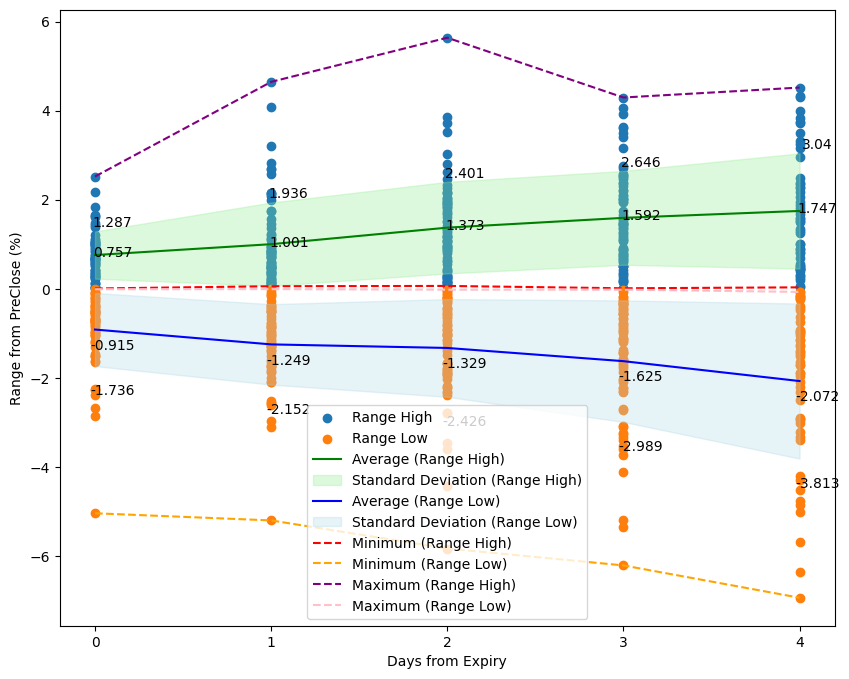

In [26]:
import matplotlib.pyplot as plt

subset = nifty.iloc[1:-1]

x = subset["Days_from_expiry"]
y1 = subset["Range_high_from_PreClose_PreCent"]
y2 = subset["Range_low_from_PreClose_PreCent"]

mask1 = (y1 != 0)
mask2 = (y2 != 0)

x1 = x[mask1]
y1 = y1[mask1]
subset1 = subset[mask1]
x2 = x[mask2]
y2 = y2[mask2]
subset2 = subset[mask2]

plt.figure(figsize=(10, 8))

plt.scatter(x1, y1, label="Range High")
plt.scatter(x2, y2, label="Range Low")

plt.xlabel("Days from Expiry")
plt.ylabel("Range from PreClose (%)")

x_ticks = [0, 1, 2, 3, 4]
x_tick_labels = ['0', '1', '2', '3', '4']
plt.xticks(x_ticks, x_tick_labels)

avg_y1 = subset1.groupby("Days_from_expiry")["Range_high_from_PreClose_PreCent"].mean()
avg_y2 = subset2.groupby("Days_from_expiry")["Range_low_from_PreClose_PreCent"].mean()
std_y1 = subset1.groupby("Days_from_expiry")["Range_high_from_PreClose_PreCent"].std()
std_y2 = subset2.groupby("Days_from_expiry")["Range_low_from_PreClose_PreCent"].std()
min_y1 = subset1.groupby("Days_from_expiry")["Range_high_from_PreClose_PreCent"].min()
min_y2 = subset2.groupby("Days_from_expiry")["Range_low_from_PreClose_PreCent"].min()
max_y1 = subset1.groupby("Days_from_expiry")["Range_high_from_PreClose_PreCent"].max()
max_y2 = subset2.groupby("Days_from_expiry")["Range_low_from_PreClose_PreCent"].max()

x_ticks_avg = np.array(x_ticks)

plt.plot(avg_y1.index, avg_y1.values, color='green', linestyle='-', label='Average (Range High)')
plt.fill_between(x_ticks_avg, avg_y1.values - std_y1.values, avg_y1.values + std_y1.values, color='lightgreen', alpha=0.3, label='Standard Deviation (Range High)')
plt.plot(avg_y2.index, avg_y2.values, color='blue', linestyle='-', label='Average (Range Low)')
plt.fill_between(x_ticks_avg, avg_y2.values + std_y2.values, avg_y2.values - std_y2.values, color='lightblue', alpha=0.3, label='Standard Deviation (Range Low)')
plt.plot(avg_y1.index, min_y1.values, color='red', linestyle='--', label='Minimum (Range High)')
plt.plot(avg_y2.index, min_y2.values, color='orange', linestyle='--', label='Minimum (Range Low)')
plt.plot(avg_y1.index, max_y1.values, color='purple', linestyle='--', label='Maximum (Range High)')
plt.plot(avg_y2.index, max_y2.values, color='pink', linestyle='--', label='Maximum (Range Low)')

# Plot values
for i, j in zip(x_ticks_avg, avg_y1.values):
    plt.text(i+0.1, j+0.2, str(round(j, 3)), color='black', ha='center', va='top')

for i, j in zip(x_ticks_avg, avg_y1.values + std_y1.values):
    plt.text(i+0.1, j+0.35, str(round(j, 3)), color='black', ha='center', va='top')

for i, j in zip(x_ticks_avg, avg_y2.values):
    plt.text(i+0.1, j-0.2, str(round(j, 3)), color='black', ha='center', va='top')

for i, j in zip(x_ticks_avg, avg_y2.values - std_y2.values):
    plt.text(i+0.1, j-0.4, str(round(j, 3)), color='black', ha='center', va='top')


plt.legend()

plt.show()


# Understanding Chart


*   **Average + Standard Deviation** of Y1 (Range High from previous close %) gives a good Range for selling Call.
*   Similarly, **Average - Standard Deviation** of Y2 (Range Low from previous close %) gives a good Range for selling Put.
* **Puts** generally carry **more risk** i.e. why we see range is **wider** on Put Side.
* As days from expiry increase optimal range to create Iron condor also increases.




In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the data into features (X) and targets (y1, y2)
X = nifty[['Days_from_expiry', 'Vix']][1:-1]
y1 = nifty['Range_high_from_PreClose_PreCent'][1:-1]
y2 = nifty['Range_low_from_PreClose_PreCent'][1:-1]

# Removing zeros from 'Range_high_from_PreClose_PreCent' and 'Range_high_from_PreClose_PreCent' for better prediction
mask1 = (y1 != 0)
mask2 = (y2 != 0)

X1 = X[mask1]
y1 = y1[mask1]
X2 = X[mask2]
y2 = y2[mask2]

# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Create a linear regression model for Range_high_from_PreClose_PreCent
model1 = LinearRegression()

# Fit the model on the training data
model1.fit(X1_train, y1_train)

# Make predictions on the test data
y1_pred = model1.predict(X1_test)

# Calculate the mean squared error (MSE) for Range_high_from_PreClose_PreCent
mse1 = mean_squared_error(y1_test, y1_pred)
print("MSE (Range_high_from_PreClose_PreCent):", mse1)

# Create a linear regression model for Range_low_from_PreClose_PreCent
model2 = LinearRegression()

# Fit the model on the training data
model2.fit(X2_train, y2_train)

# Make predictions on the test data
y2_pred = model2.predict(X2_test)

# Calculate the mean squared error (MSE) for Range_low_from_PreClose_PreCent
mse2 = mean_squared_error(y2_test, y2_pred)
print("MSE (Range_low_from_PreClose_PreCent):", mse2)


MSE (Range_high_from_PreClose_PreCent): 0.9850028679530959
MSE (Range_low_from_PreClose_PreCent): 1.1531356982065921


# Prediction of Range low and high using model 

In [31]:
vix_value = 20
days_from_expiry_value = 3

X_pred = np.array([[days_from_expiry_value, vix_value]])

y1_pred = model1.predict(X_pred)
print("Predicted Range_high_from_PreClose_PreCent:", y1_pred)
y2_pred = model2.predict(X_pred)
print("Predicted Range_low_from_PreClose_PreCent:", y2_pred)


Predicted Range_high_from_PreClose_PreCent: [1.78135259]
Predicted Range_low_from_PreClose_PreCent: [-1.93354402]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


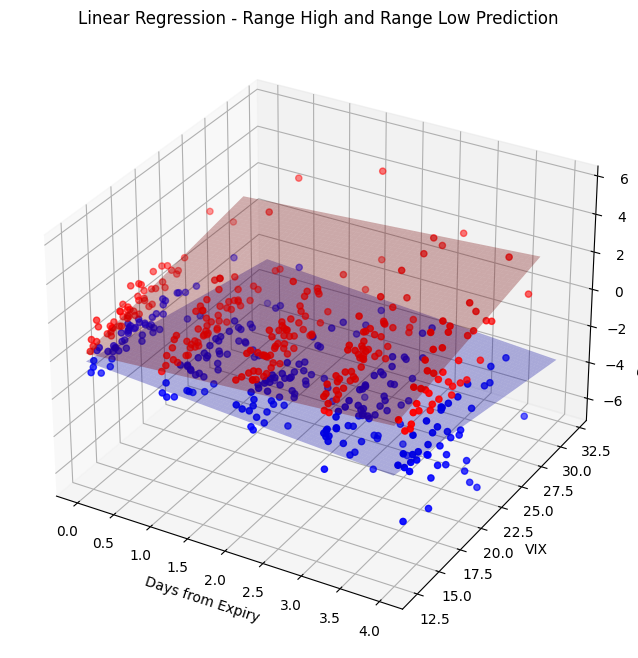

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# Split the data into train and test sets
train_ratio = 0.8
train_size = int(train_ratio * len(nifty))
train_data = nifty[:train_size]
test_data = nifty[train_size:]

# Train data - Model 1 (Range High)
X1_train = X1_train.values
y1_train = y1_train.values

# Train data - Model 2 (Range Low)
X2_train = X2_train.values
y2_train = y2_train.values

# Generate meshgrid for X1_train
vix_vals_1 = np.linspace(X1_train[:, 1].min(), X1_train[:, 1].max(), 100)
days_vals_1 = np.linspace(X1_train[:, 0].min(), X1_train[:, 0].max(), 100)
vix_mesh_1, days_mesh_1 = np.meshgrid(vix_vals_1, days_vals_1)

# Generate meshgrid for X2_train
vix_vals_2 = np.linspace(X2_train[:, 1].min(), X2_train[:, 1].max(), 100)
days_vals_2 = np.linspace(X2_train[:, 0].min(), X2_train[:, 0].max(), 100)
vix_mesh_2, days_mesh_2 = np.meshgrid(vix_vals_2, days_vals_2)

# Predict using the trained models
X1_test = np.column_stack((days_mesh_1.ravel(), vix_mesh_1.ravel()))
X2_test = np.column_stack((days_mesh_2.ravel(), vix_mesh_2.ravel()))
y1_pred = model1.predict(X1_test)
y2_pred = model2.predict(X2_test)

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the training data points
ax.scatter(X1_train[:, 0], X1_train[:, 1], y1_train, c='r', marker='o', label='Range High')
ax.scatter(X2_train[:, 0], X2_train[:, 1], y2_train, c='b', marker='o', label='Range Low')

# Plot the regression plane for Model 1 (Range High)
ax.plot_surface(days_mesh_1, vix_mesh_1, y1_pred.reshape(days_mesh_1.shape), color='r', alpha=0.3, label='Regression Plane (Range High)')

# Plot the regression plane for Model 2 (Range Low)
ax.plot_surface(days_mesh_2, vix_mesh_2, y2_pred.reshape(days_mesh_2.shape), color='b', alpha=0.3, label='Regression Plane (Range Low)')

# Set labels and title
ax.set_xlabel('Days from Expiry')
ax.set_ylabel('VIX')
ax.set_zlabel('Range from PreClose (%)')
ax.set_title('Linear Regression - Range High and Range Low Prediction')

# Show the plot
plt.show()


# Minimizing losing Days by Identifying Outliers
* In reality, it increased my returns from **68%** in FY2021-22 to **140%** in FY2022-23

In [ ]:
nifty = index_df(symbol="Nifty 50", from_date=date(2010,9,30),to_date=date(2023,3,31))

In [ ]:
# Remove Duplicates and false data and reset Index
nifty = nifty.drop_duplicates(subset='HistoricalDate').reset_index(drop=True)
nifty = nifty.drop(nifty[nifty['INDEX_NAME'] == 'NIFTY BANK'].index).reset_index(drop=True)

In [ ]:
# Convert 'historical_date' column to datetime if it's not already
nifty['HistoricalDate'] = pd.to_datetime(nifty['HistoricalDate'])

# Sort nifty by historical date in descending order
nifty = nifty.sort_values(by='HistoricalDate', ascending=False)

# Filter out dates below September 30, 2010
nifty = nifty[nifty['HistoricalDate'] >= pd.Timestamp(2010, 9, 30)]

# Reset the index
nifty = nifty.reset_index(drop=True)


In [ ]:
nifty = nifty.drop(['Index Name'], axis=1)
nifty['Day_of_week'] = pd.to_datetime(nifty['HistoricalDate'],format='%Y-%m-%d').dt.strftime('%A')
returns = [(nifty['CLOSE'][i] - nifty['CLOSE'][i+1]) / nifty['CLOSE'][i+1] * 100 for i in range(len(nifty) - 1)]
returns.append(float('nan'))
nifty['Returns_Daily'] = returns

In [ ]:
nifty

,INDEX_NAME,HistoricalDate,OPEN,HIGH,LOW,CLOSE,Day_of_week,Returns_Daily
0,NIFTY 50,2023-06-02,18550.85,18573.70,18478.40,18534.10,Friday,0.250707
1,NIFTY 50,2023-06-01,18579.40,18580.30,18464.55,18487.75,Thursday,-0.251694
2,NIFTY 50,2023-05-31,18594.20,18603.90,18483.85,18534.40,Wednesday,-0.533706
3,NIFTY 50,2023-05-30,18606.65,18662.45,18575.50,18633.85,Tuesday,0.189261
4,NIFTY 50,2023-05-29,18619.15,18641.20,18581.25,18598.65,Monday,0.536776
...,...,...,...,...,...,...,...,...
3102,Nifty 50,2010-10-06,6150.95,6223.40,6148.60,6186.40,Wednesday,0.660614
3103,Nifty 50,2010-10-05,6159.45,6188.35,6118.05,6145.80,Tuesday,-0.220801
3104,Nifty 50,2010-10-04,6144.70,6222.10,6144.70,6159.40,Monday,0.260442
3105,Nifty 50,2010-10-01,6030.30,6153.10,6030.30,6143.40,Friday,1.882287


<ipython-input-92-bf0e0b081fca>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nf['Day_of_week'] = pd.Categorical(nf['Day_of_week'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday'], ordered=True)


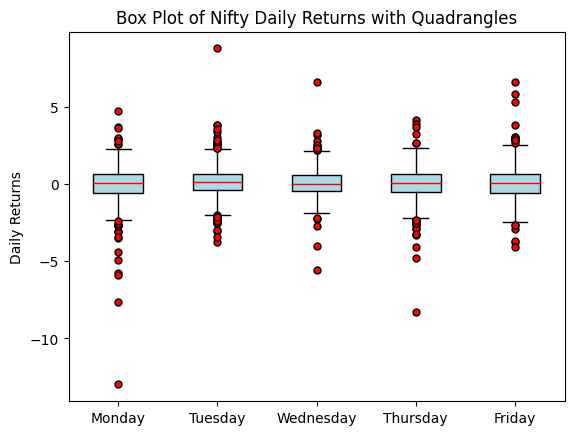

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

nf = nifty[:-1]

# Create a custom ordered categorical variable for Day_of_week
nf['Day_of_week'] = pd.Categorical(nf['Day_of_week'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday'], ordered=True)

grouped_data = nf.groupby('Day_of_week')['Returns_Daily'].apply(list)

# Create a list of data points for each day of the week
data = [grouped_data.get(day, []) for day in range(0, 5)]  # Assuming day of the week is represented as integers from 1 to 5 (Monday to Friday)

# Create a figure and axis
fig, ax = plt.subplots()

# Customize the boxplot appearance
boxprops = dict(facecolor='lightblue', edgecolor='black')
flierprops = dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none')
whiskerprops = dict(color='black')
capprops = dict(color='black')
medianprops = dict(color='red')

# Plot the boxplot with quadrangles
boxes = ax.boxplot(data, patch_artist=True, flierprops=flierprops, whiskerprops=whiskerprops,
                   capprops=capprops, medianprops=medianprops)

# Set the facecolor for the boxes
for box in boxes['boxes']:
    box.set(facecolor='lightblue')

# Set the labels and title
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
ax.set_ylabel('Daily Returns')
ax.set_title('Box Plot of Nifty Daily Returns with Quadrangles')

# Show the plot
plt.show()


# --------------------------------END--------------------------
# Below code is for testing and Debugging

In [ ]:
import seaborn as sns
sns.displot(new_df, kde = True)

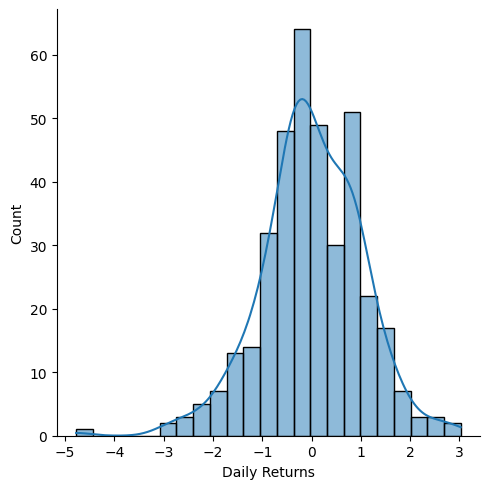

In [ ]:
import seaborn as sns
sns.displot(new_df['Daily Returns'], kde = True)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

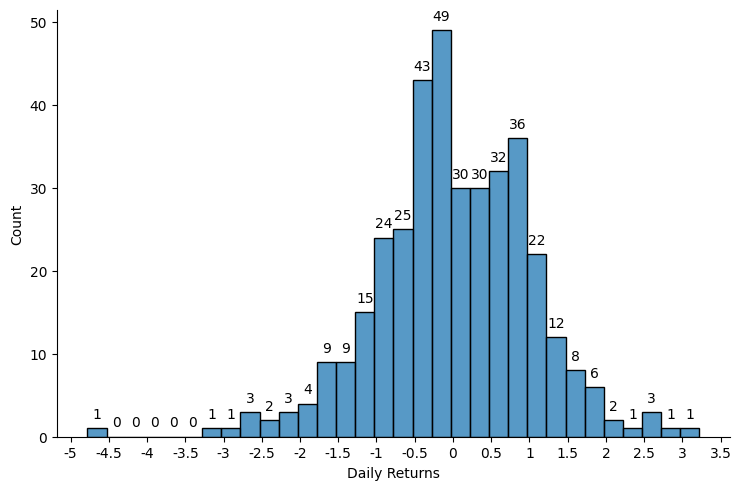

In [ ]:
g = sns.displot(new_df['Daily Returns'],binwidth = 0.25,height=5, aspect=1.5)
for p in g.ax.patches:
    # Add the value of the bar as text above the bar
    g.ax.annotate(f"{p.get_height()}", 
                  (p.get_x() + p.get_width() / 2, p.get_height()), 
                  ha='center', va='center', 
                  xytext=(0, 10), # (x,y) coordinates of text above the bar
                  textcoords='offset points')
    
x_ticks = [-5,-4.5, -4,-3.5,-3,-2.5,-2,-1.5,-1,-0.5, 0,0.5,1,1.5, 2,2.5, 3,3.5]
x_tick_labels = ['-5','-4.5', '-4','-3.5','-3','-2.5','-2','-1.5','-1','-0.5' ,'0','0.5','1','1.5', '2','2.5', '3','3.5']
plt.xticks(x_ticks, x_tick_labels)

# Show the plot
plt.show()

<ipython-input-88-b8a8f5f1243b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_close['HistoricalDate'] = pd.to_datetime(df_close['HistoricalDate'],format='%Y-%m-%d')


Text(2022-03-01 00:00:00, 16020, '16000')

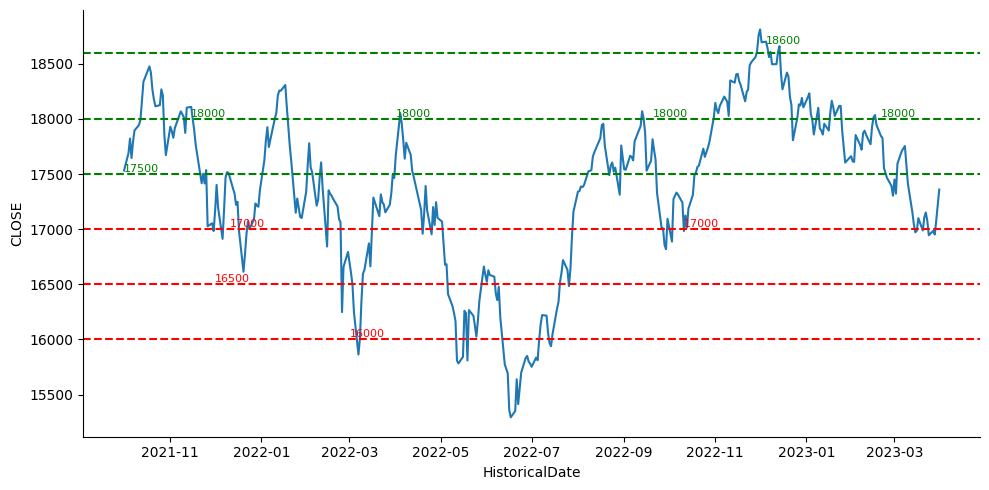

In [ ]:
df_close = new_df[['HistoricalDate', 'CLOSE']]
df_close['HistoricalDate'] = pd.to_datetime(df_close['HistoricalDate'],format='%Y-%m-%d')
# Create a line chart using Seaborn
# sns.lineplot(x='HistoricalDate', y='CLOSE', data=df_close)
sns.relplot(x='HistoricalDate', y='CLOSE', kind='line', data=df_close, height=5,aspect = 2)

plt.axhline(y=18000, color='g', linestyle='--')
plt.text(pd.Timestamp('2021-11-15'), 18020, '18000', color='g', fontsize=8)
plt.text(pd.Timestamp('2022-04-01'), 18020, '18000', color='g', fontsize=8)
plt.text(pd.Timestamp('2022-09-20'), 18020, '18000', color='g', fontsize=8)
plt.text(pd.Timestamp('2023-02-20'), 18020, '18000', color='g', fontsize=8)

plt.axhline(y=18600, color='g', linestyle='--')
plt.text(pd.Timestamp('2022-12-05'), 18680, '18600', color='g', fontsize=8)

plt.axhline(y=17500, color='g', linestyle='--')
plt.text(pd.Timestamp('2021-10-01'), 17520, '17500', color='g', fontsize=8)

plt.axhline(y=17000, color='r', linestyle='--')
plt.text(pd.Timestamp('2021-12-11'), 17020, '17000', color='r', fontsize=8)
plt.text(pd.Timestamp('2022-10-11'), 17020, '17000', color='r', fontsize=8)

plt.axhline(y=16500, color='r', linestyle='--')
plt.text(pd.Timestamp('2021-12-01'), 16520, '16500', color='r', fontsize=8)

plt.axhline(y=16000, color='r', linestyle='--')
plt.text(pd.Timestamp('2022-03-01'), 16020, '16000', color='r', fontsize=8)